##########################################################################################
# TEST NNexplainer for Classification model
##########################################################################################

In [1]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import sys

from sklearn.datasets import load_wine

In [2]:
# import NNexplainer library
sys.path.append('C:/Users/user/tmp/')              # folder for 'explain_NN.py' 
from explain_NN import NNexplainer

In [3]:
# load dataset
X, y = load_wine(return_X_y=True, as_frame=True)
y_multi = np.array(y)

In [4]:
# one-hot coding
mlb = MultiLabelBinarizer()
y_multi = mlb.fit_transform(y_multi.reshape(-1, 1))

In [5]:
# change long column names to short 
X.columns = ['alcohol', 'malic_acid', 'ash', 'al_of_ash', 'magnesium',
       't_phenols', 'flavanoids', 'n_phenols',
       'proan', 'c_intensity', 'hue',
       'd_wines', 'proline']

In [6]:
# split dataset
X_train_org, X_test_org, y_train, y_test = train_test_split(
    X, y_multi, test_size=0.3, random_state=1)

In [7]:
# Scale data to 0 ~ 1 
# which is importance for convergence of the neural network
scaler = MinMaxScaler()                 
scaler.fit(X_train_org)

MinMaxScaler()

In [8]:
# number of features (variables)
n_features = X.shape[1]
# number of classes
n_class = len(np.unique(y))

In [9]:
# create an NNexplainer object
eNN = NNexplainer(random_state=5, scaler=scaler)

In [10]:

# Build a model
params = {'lr': 0.05, 'batch_size': 10, 'epochs': 40, 'layers': [32, 16, n_class], 'feature_names': X_train_org.columns.to_list()}
disp = eNN.build_NN(X_train_org, y_train, params, task='classification')

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5345 - loss: 0.8129 - val_accuracy: 0.9600 - val_loss: 0.2909
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9034 - loss: 0.3108 - val_accuracy: 0.6800 - val_loss: 0.9247
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9406 - loss: 0.2319 - val_accuracy: 0.9200 - val_loss: 0.1799
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9464 - loss: 0.0884 - val_accuracy: 0.7600 - val_loss: 0.5507
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9123 - loss: 0.2298 - val_accuracy: 0.9200 - val_loss: 0.1986
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9107 - loss: 0.1694 - val_accuracy: 0.8800 - val_loss: 0.4024
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.0787 - val_accuracy: 0.8800 - val_loss: 0.5657
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0396 - val_accuracy: 0.9200 - val_loss

In [11]:
print(eNN._model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,083 (12.05 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,056 (8.04 KB)

None


In [12]:
# model performance
score = eNN._model.evaluate(scaler.transform(X_test_org), y_test, verbose=0)
print('Test loss:', score[0])
print('Test acuracy:', score[1])

Test loss: 0.003131199162453413
Test acuracy: 1.0


In [13]:
# Explain a prediction
idx=0
input_org = X_test_org.iloc[idx,:]

In [18]:
print(input_org)

alcohol         13.69
malic_acid       3.26
ash              2.54
al_of_ash       20.00
magnesium      107.00
t_phenols        1.83
flavanoids       0.56
n_phenols        0.50
proan            0.80
c_intensity      5.88
hue              0.96
d_wines          1.82
proline        680.00
Name: 161, dtype: float64


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[ -7.2147821   -5.91621077  10.51681724 -23.23315642  14.92844819
   -4.05995464   0.86250517 -13.02672846  -2.03443907  14.78160498
   -0.24552666   3.38345515   7.67903977]
 [  3.35747811   3.12323551  -5.00066037  10.18291404  -8.67050791
    2.13894521  -0.32416727   5.77283709   0.714789    -8.47770513
    0.83831621  -1.56463622  -3.40219376]
 [  6.74848676   4.36966512  -5.60150873  14.47078179  -6.75896963
    1.76775114  -0.6899749    7.48925103   1.89861263  -6.21020572
   -1.65619729  -2.85730115  -4.46850536]]


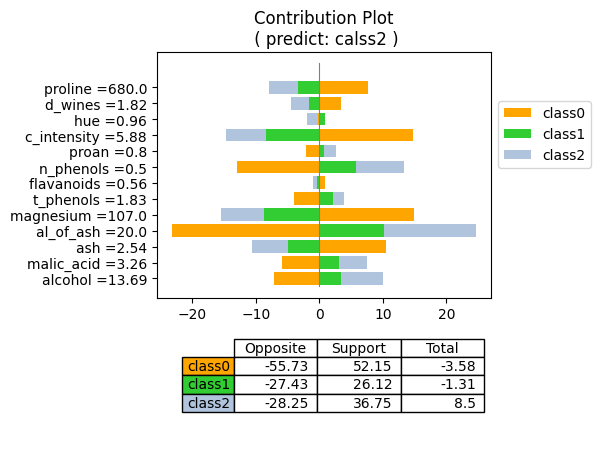

In [14]:
# contribution plot
con_list = eNN.plot_contribution_C(input_org)  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[ -7.2147821   -5.91621077  10.51681724 -23.23315642  14.92844819
   -4.05995464   0.86250517 -13.02672846  -2.03443907  14.78160498
   -0.24552666   3.38345515   7.67903977]
 [  3.35747811   3.12323551  -5.00066037  10.18291404  -8.67050791
    2.13894521  -0.32416727   5.77283709   0.714789    -8.47770513
    0.83831621  -1.56463622  -3.40219376]
 [  6.74848676   4.36966512  -5.60150873  14.47078179  -6.75896963
    1.76775114  -0.6899749    7.48925103   1.89861263  -6.21020572
   -1.65619729  -2.85730115  -4.46850536]]


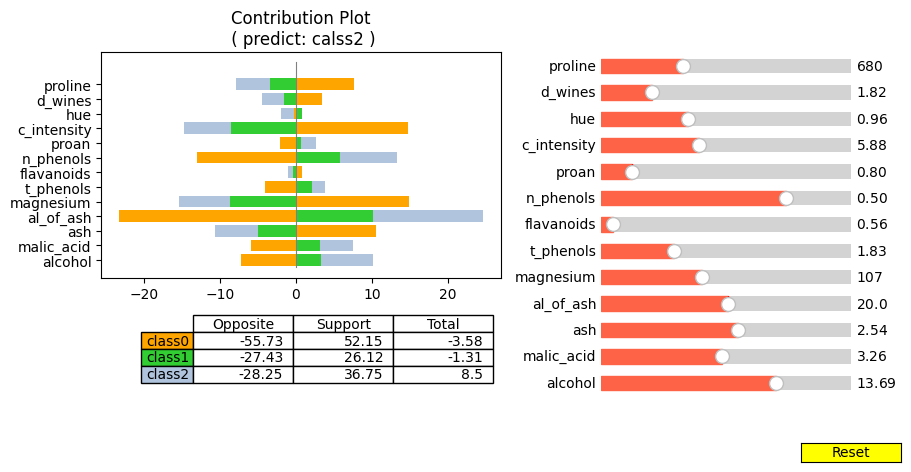

In [15]:
# interactive contribution plot
con_list = eNN.plot_contribution_interactive_C(input_org)

In [17]:
print(con_list)

    alcohol  malic_acid        ash  al_of_ash  magnesium  t_phenols  \
0 -7.214782   -5.916211  10.516817 -23.233156  14.928448  -4.059955   
1  3.357478    3.123236  -5.000660  10.182914  -8.670508   2.138945   
2  6.748487    4.369665  -5.601509  14.470782  -6.758970   1.767751   

   flavanoids  n_phenols     proan  c_intensity       hue   d_wines   proline  
0    0.862505 -13.026728 -2.034439    14.781605 -0.245527  3.383455  7.679040  
1   -0.324167   5.772837  0.714789    -8.477705  0.838316 -1.564636 -3.402194  
2   -0.689975   7.489251  1.898613    -6.210206 -1.656197 -2.857301 -4.468505  


Permutation test.....


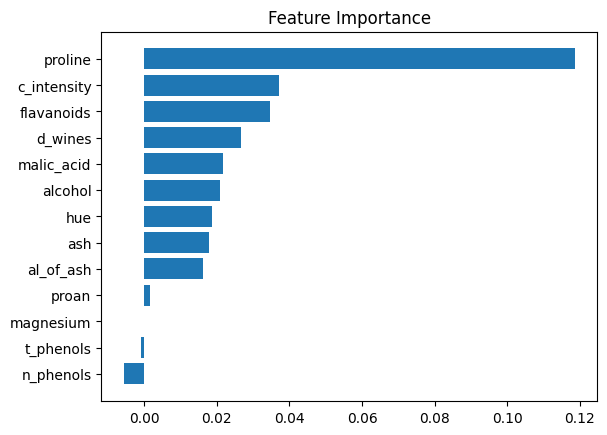

In [16]:
# feature importance plot
eNN.plot_feature_importance(X_train_org, y_train)

In [ ]:
# In the feature importance plot, 'proline' is 0.12
# If the influnece of 'proline' is removed, the prediction accuracy decreases by 0.12.